<a href="https://colab.research.google.com/github/Balamahaniya/classification-of-cyberbullying-tweets/blob/main/classificationofcyberbullyingtweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Uninstall existing numpy and gensim (to avoid conflicts)
!pip uninstall -y numpy gensim

# Install compatible versions
!pip install numpy==1.23.5
!pip install gensim==4.3.0

# Install other packages
!pip install contractions nltk autocorrect matplotlib seaborn emoji xgboost tensorflow imbalanced-learn
!pip install --upgrade pandas

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyfume 0.3.4 requires numpy==1.24.4, but you have numpy 1.23.5 which is incompatible.
pyfume 0.3.4 requires pandas==1.5.3, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incom

  Using cached gensim-4.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.4 kB)
  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached gensim-4.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (24.1 MB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are in

  Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyfume 0.3.4 requires numpy==1.24.4, but you have numpy 1.26.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.2.

In [ ]:
import string
import nltk
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
import spacy

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load Spacy
nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cyberbullying_tweets.csv')


df = df.rename(columns={'tweet_text': 'text', 'cyberbullying_type': 'sentiment'})

# Encode sentiment labels
label_mapping = {"religion": 0, "age": 1, "gender": 2, "ethnicity": 3, "not_cyberbullying": 4}
df["sentiment"] = df["sentiment"].map(label_mapping)

# Display class distribution
print("\nClass Distribution (Before Cleaning):\n", df['sentiment'].value_counts())

# Show sample tweets
print("\nSample Tweets Before Cleaning:\n", df[['text', 'sentiment']].head())



Class Distribution (Before Cleaning):
 sentiment
0.0    7998
1.0    7992
2.0    7973
3.0    7961
4.0    7945
Name: count, dtype: int64

Sample Tweets Before Cleaning:
                                                 text  sentiment
0  In other words #katandandre, your food was cra...        4.0
1  Why is #aussietv so white? #MKR #theblock #ImA...        4.0
2  @XochitlSuckkks a classy whore? Or more red ve...        4.0
3  @Jason_Gio meh. :P  thanks for the heads up, b...        4.0
4  @RudhoeEnglish This is an ISIS account pretend...        4.0


In [ ]:
def advanced_preprocessing(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'[^\x00-\x7f]',r'', text)  # Remove non-ASCII characters
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)  # Remove mentions and links
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces

    # Use spaCy for lemmatization & stopword removal
    doc = nlp(text)
    text = " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

    return text

df['text_clean'] = df['text'].apply(advanced_preprocessing)

# Display cleaned output
print("\nSample Cleaned Tweets:\n", df[['text_clean', 'sentiment']].head())



Sample Cleaned Tweets:
                                           text_clean  sentiment
0             word katandandre food crapilicious mkr        4.0
1  aussietv white mkr theblock imacelebrityau tod...        4.0
2                    classy whore red velvet cupcake        4.0
3     meh :p thank head concerned angry dude twitter        4.0
4  isis account pretend kurdish account like isla...        4.0



Text Length Statistics:
count    47692.000000
mean        11.842594
std          7.794989
min          0.000000
25%          6.000000
50%         10.000000
75%         16.000000
max        343.000000
Name: text_length, dtype: float64

Data after text length filtering:
                                          text_clean  text_length  sentiment
0             word katandandre food crapilicious mkr            5        4.0
1  aussietv white mkr theblock imacelebrityau tod...           11        4.0
2                    classy whore red velvet cupcake            5        4.0
3     meh :p thank head concerned angry dude twitter            8        4.0
4  isis account pretend kurdish account like isla...            8        4.0


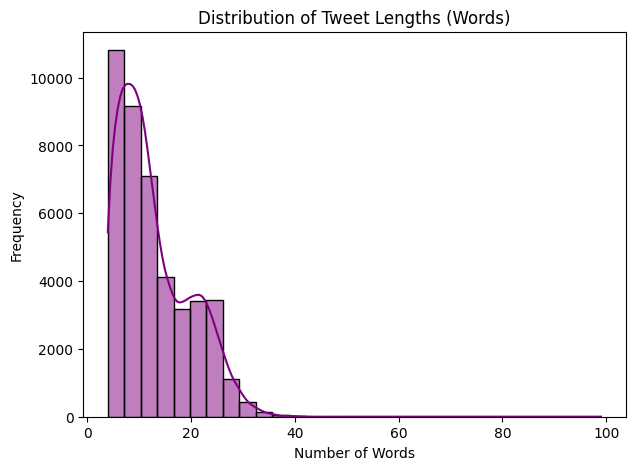

In [ ]:
# Calculate text length (word count)
df['text_length'] = df['text_clean'].apply(lambda x: len(x.split()))

# Display text length statistics
print("\nText Length Statistics:")
print(df['text_length'].describe())

# Remove texts that are too short (< 3 words) or too long (> 100 words)
df = df[(df['text_length'] > 3) & (df['text_length'] < 100)]

# Display cleaned data after filtering
print("\nData after text length filtering:")
print(df[['text_clean', 'text_length', 'sentiment']].head())

# Plot histogram of text lengths
plt.figure(figsize=(7,5))
sns.histplot(df['text_length'], bins=30, kde=True, color="purple")
plt.title("Distribution of Tweet Lengths (Words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Check for missing values
print("\nMissing values before handling:\n", df.isnull().sum())

# Drop rows with missing sentiment values
df = df.dropna(subset=['sentiment'])

# Ensure sentiment column is integer type
df['sentiment'] = df['sentiment'].astype(int)

# Verify missing values are removed
print("\nMissing values after handling:\n", df.isnull().sum())



Missing values before handling:
 text              0
sentiment      5665
text_clean        0
text_length       0
dtype: int64

Missing values after handling:
 text           0
sentiment      0
text_clean     0
text_length    0
dtype: int64


<ipython-input-6-2c53f3682fd0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['sentiment'].astype(int)


In [ ]:
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer

# Tokenizing text safely
df.loc[:, 'tokenized_text'] = df['text_clean'].apply(lambda x: x.split())

# Train Word2Vec model
w2v_model = Word2Vec(sentences=df['tokenized_text'], vector_size=100, window=5, min_count=2, workers=4)

# Compute TF-IDF scores
tfidf = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['text_clean'])
tfidf_vocab = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

# Function to generate TF-IDF Weighted Word2Vec Embeddings
def tfidf_weighted_w2v(text):
    words = text.split()
    vector = np.zeros(100)
    weight_sum = 0
    for word in words:
        if word in w2v_model.wv:
            weight = tfidf_vocab.get(word, 1)  # Get TF-IDF weight for word
            vector += w2v_model.wv[word] * weight
            weight_sum += weight
    return vector / weight_sum if weight_sum != 0 else vector  # Normalize vector

# Apply TF-IDF Weighted Word2Vec safely
df.loc[:, 'tfidf_w2v'] = df['text_clean'].apply(tfidf_weighted_w2v)

# Convert embeddings to NumPy array for model training
X_scaled = np.vstack(df['tfidf_w2v'])

# Normalize feature vectors
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_scaled)

print("\n Word2Vec and TF-IDF Weighted Word2Vec embeddings successfully generated!")



 Word2Vec and TF-IDF Weighted Word2Vec embeddings successfully generated!


In [ ]:
df.head()

,text,sentiment,text_clean,text_length,tokenized_text,tfidf_w2v
0,"In other words #katandandre, your food was cra...",4,word katandandre food crapilicious mkr,5,"[word, katandandre, food, crapilicious, mkr]","[-0.04618857545714425, -0.07924490386418143, 0..."
1,Why is #aussietv so white? #MKR #theblock #ImA...,4,aussietv white mkr theblock imacelebrityau tod...,11,"[aussietv, white, mkr, theblock, imacelebritya...","[-0.21893868458548557, -0.10772193545881177, 0..."
2,@XochitlSuckkks a classy whore? Or more red ve...,4,classy whore red velvet cupcake,5,"[classy, whore, red, velvet, cupcake]","[-0.07728675416014007, 0.01445378158380062, 0...."
3,"@Jason_Gio meh. :P thanks for the heads up, b...",4,meh :p thank head concerned angry dude twitter,8,"[meh, :p, thank, head, concerned, angry, dude,...","[-0.22902363653141275, 0.03830155387390719, 0...."
4,@RudhoeEnglish This is an ISIS account pretend...,4,isis account pretend kurdish account like isla...,8,"[isis, account, pretend, kurdish, account, lik...","[-0.2875641653592138, 0.2527946501424079, 0.48..."


In [ ]:
# Convert features to NumPy array
X_scaled = np.vstack(df['tfidf_w2v'])

# Normalize feature vectors
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['sentiment'], test_size=0.2, stratify=df['sentiment'], random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

# Display class distribution after SMOTE
print("\nClass Distribution (After SMOTE):\n", np.bincount(y_train))



Class Distribution (After SMOTE):
 [6325 6325 6325 6325 6325]


In [ ]:
#  Install necessary libraries
!pip install -U tensorflow keras numpy scikit-learn

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, Attention,
    Dense, Input, Dropout, SpatialDropout1D, Flatten
)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential

#  Ensure labels are correctly formatted
df['sentiment'] = df['sentiment'].astype(int)

#  Tokenization
tokenizer = Tokenizer(num_words=10000)  # Increased vocabulary size
tokenizer.fit_on_texts(df['text_clean'])
X_seq = tokenizer.texts_to_sequences(df['text_clean'])
X_padded = pad_sequences(X_seq, maxlen=150)  # Increased sequence length

#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_padded, df['sentiment'], test_size=0.2, stratify=df['sentiment'], random_state=42
)

#  Reshape y_train and y_test for compatibility
y_train = np.array(y_train).reshape(-1,)
y_test = np.array(y_test).reshape(-1,)

#  Define Embedding Parameters
embedding_dim = 128
vocab_size = len(tokenizer.word_index) + 1 #Hybrid Model: CNN + BiLSTM + Attention
input_layer = Input(shape=(150,))

#  Embedding Layer
embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(input_layer)

# CNN for Feature Extraction
conv = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(embedding)
pool = MaxPooling1D(pool_size=2)(conv)

#  BiLSTM for Sequential Understanding
bilstm = Bidirectional(LSTM(100, return_sequences=True))(pool)
dropout = SpatialDropout1D(0.3)(bilstm)

#  Attention Mechanism
attention = Attention()([dropout, dropout])

#  Flatten before Fully Connected Layers
flat = Flatten()(attention)

#  Fully Connected Layers
dense1 = Dense(64, activation='relu')(flat)
dropout2 = Dropout(0.4)(dense1)
output_layer = Dense(5, activation='softmax')(dropout2)  # ✅ 5 Classes

#  Compile Model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-4),
    metrics=['accuracy']
)

#  Train Model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

#  Predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

#  Classification Report
print("\n Classification Report for CNN + BiLSTM + Attention Model:\n", classification_report(y_test, y_pred))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 91.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: tensorflow
    Fou

In [ ]:
from sklearn.metrics import accuracy_score

#  Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n Final Accuracy (CNN + BiLSTM + Attention Model): {accuracy:.4f}")



 Final Accuracy (CNN + BiLSTM + Attention Model): 0.9156


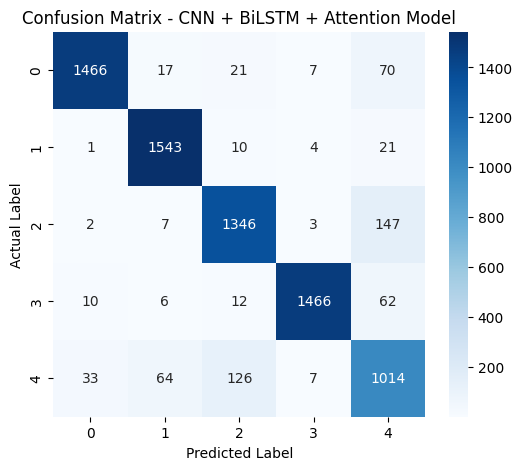

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#  Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

#  Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(5), yticklabels=range(5))
plt.title("Confusion Matrix - CNN + BiLSTM + Attention Model")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


In [ ]:
# Naive Bayes (Fixed with GaussianNB)
# nb_clf = GaussianNB()
# nb_clf.fit(X_train, y_train)

# KNN Hyperparameter Tuning
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)
knn_clf = grid_knn.best_estimator_

# Random Forest Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
   'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
rf_clf = grid_rf.best_estimator_

# Stacking Classifier with XGBoost
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('knn', knn_clf)
    ],
    final_estimator=RandomForestClassifier(n_estimators=100)
)
stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(min_samples_split=5,
                                                       n_estimators=300)),
                               ('knn', KNeighborsClassifier(n_neighbors=9))],
                   final_estimator=RandomForestClassifier())

In [ ]:
from sklearn.model_selection import KFold

# Convert labels to NumPy arrays
y_train_hybrid = np.array(y_train)

# Define K-Fold Cross-Validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)
hybrid_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_hybrid[train_index], y_train_hybrid[val_index]

    #  Define Hybrid Model: CNN + BiLSTM + Attention
    input_layer = Input(shape=(150,))

    #  Embedding Layer
    embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(input_layer)

    #  CNN for Feature Extraction
    conv = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(embedding)
    pool = MaxPooling1D(pool_size=2)(conv)

    #  BiLSTM for Sequential Understanding
    bilstm = Bidirectional(LSTM(100, return_sequences=True))(pool)
    dropout = SpatialDropout1D(0.3)(bilstm)

    #  Attention Mechanism
    attention = Attention()([dropout, dropout])

    #  Flatten before Fully Connected Layers
    flat = Flatten()(attention)

    #  Fully Connected Layers
    dense1 = Dense(64, activation='relu')(flat)
    dropout2 = Dropout(0.4)(dense1)
    output_layer = Dense(5, activation='softmax')(dropout2)  # ✅ 5 Classes

    #  Compile Model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=2e-4),
        metrics=['accuracy']
    )

    #  Train Model for Cross-Validation
    model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=32, verbose=1, validation_data=(X_val_fold, y_val_fold))

    #  Evaluate the model
    _, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=1)
    hybrid_scores.append(accuracy)

#  Print Cross-Validation Score for Hybrid Model
print("\n Cross-validation score (Hybrid CNN + BiLSTM + Attention Model):", np.mean(hybrid_scores))


Epoch 1/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 194s 272ms/step - accuracy: 0.5200 - loss: 1.0272 - val_accuracy: 0.9220 - val_loss: 0.2407
Epoch 2/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 227s 307ms/step - accuracy: 0.9318 - loss: 0.2201 - val_accuracy: 0.9222 - val_loss: 0.2325
Epoch 3/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 261s 306ms/step - accuracy: 0.9532 - loss: 0.1571 - val_accuracy: 0.9261 - val_loss: 0.2346
Epoch 4/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 253s 294ms/step - accuracy: 0.9647 - loss: 0.1180 - val_accuracy: 0.9310 - val_loss: 0.2364
Epoch 5/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 265s 298ms/step - accuracy: 0.9765 - loss: 0.0886 - val_accuracy: 0.9265 - val_loss: 0.2979
234/234 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - accuracy: 0.9235 - loss: 0.3189
Epoch 1/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 206s 289ms/step - accuracy: 0.5267 - loss: 1.0321 - val_accuracy: 0.9235 - val_loss: 0.2389
Epoch 2/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 256s 280ms/step - accuracy: 0.9391 - loss: 0.2055 - val_accuracy: 0.9307 - val_loss: 0.2167
Epoch 

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Gaussian Naive Bayes
#NB_cv_score = cross_val_score(nb_clf, X_train, y_train, cv=10)

# Cross-validation for K-Nearest Neighbors
#KNN_cv_score = cross_val_score(knn_clf, X_train, y_train, cv=10)

# Cross-validation for Random Forest
RF_cv_score = cross_val_score(rf_clf, X_train, y_train, cv=10)

# Cross-validation for Stacking Classifier
stacking_cv_score = cross_val_score(stacking_clf, X_train, y_train, cv=10)
Hybrid_cv_score = np.mean(hybrid_scores)
# Print cross-validation scores for ML models
print("\nCross-validation Scores:")
#print('Naive Bayes:', NB_cv_score.mean())
#print('K-Nearest Neighbor:', KNN_cv_score.mean())
print('Random Forest:', RF_cv_score.mean())
print('Stacking Classifier:', stacking_cv_score.mean())
print(f'Hybrid CNN + BiLSTM + Attention Model: {Hybrid_cv_score}')



Cross-validation Scores:
Random Forest: 0.7668787675820494
Stacking Classifier: 0.7691225720026791
Hybrid CNN + BiLSTM + Attention Model: 0.9241125285625458


In [ ]:
# Predictions
#nb_pred = nb_clf.predict(X_test)
#knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
stacking_pred = stacking_clf.predict(X_test)


# Print classification reports
models = {
    #"Naive Bayes": nb_pred,
    #"KNN": knn_pred,
    "Random Forest": rf_pred,
    "Stacking Classifier": stacking_pred,


}

for model_name, pred in models.items():
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_test, pred))



Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.66      0.76      0.71      1581
           1       0.91      0.97      0.94      1579
           2       0.79      0.66      0.72      1505
           3       0.88      0.67      0.77      1556
           4       0.63      0.75      0.68      1244

    accuracy                           0.77      7465
   macro avg       0.77      0.77      0.76      7465
weighted avg       0.78      0.77      0.77      7465


Classification Report for Stacking Classifier:

              precision    recall  f1-score   support

           0       0.65      0.75      0.70      1581
           1       0.95      0.97      0.96      1579
           2       0.80      0.67      0.73      1505
           3       0.85      0.72      0.78      1556
           4       0.64      0.75      0.69      1244

    accuracy                           0.77      7465
   macro avg       0.78      0.77      

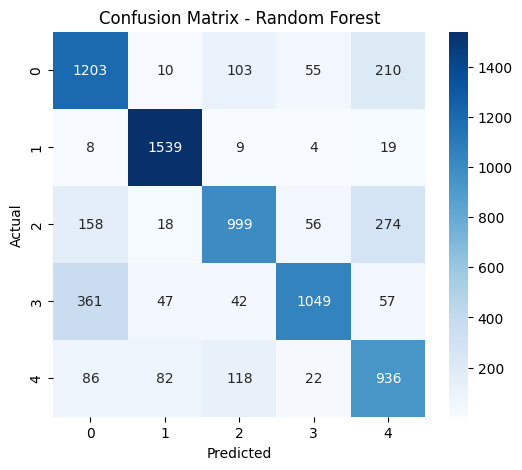

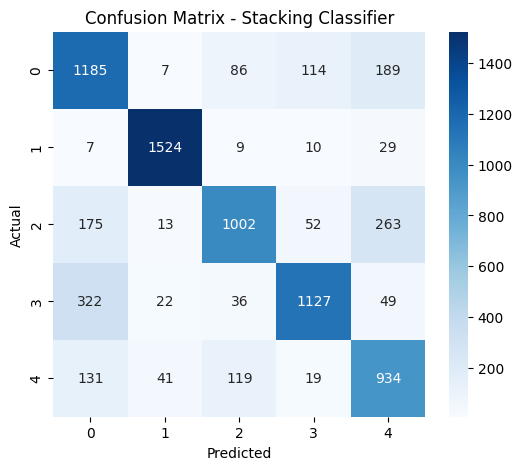

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

for model_name, pred in models.items():
    plot_confusion_matrix(y_test, pred, model_name)


In [ ]:
#  Predictions for ML models
#nb_pred = nb_clf.predict(X_test)
knn_pred = knn_clf.predict(X_test)
stacking_pred = stacking_clf.predict(X_test)

#  Predictions for Hybrid Model
hybrid_pred = np.argmax(model.predict(X_test), axis=1)


234/234 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step


In [ ]:
#  Convert y_test to DataFrame for easy visualization
test_results = pd.DataFrame({
    "Actual Sentiment": y_test,
    #"Naive Bayes Prediction": nb_pred,
    #"KNN Prediction": knn_pred,
    "Stacking Prediction": stacking_pred,
    "Hybrid Model Prediction": hybrid_pred
})

#  Display first 10 predictions
print("\nOutput for Testing Data:\n")
print(test_results.head(10))



Output for Testing Data:

   Actual Sentiment  Stacking Prediction  Hybrid Model Prediction
0                 2                    0                        2
1                 4                    4                        4
2                 4                    4                        4
3                 3                    3                        3
4                 0                    0                        0
5                 2                    2                        2
6                 4                    2                        2
7                 0                    0                        0
8                 3                    3                        3
9                 2                    0                        2


In [ ]:
#  Function to preprocess a single text input
def preprocess_single_text(text):
    # Apply the same cleaning steps
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'[^\x00-\x7f]',r'', text)
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    text = re.sub(r"\s+", " ", text).strip()

    doc = nlp(text)
    clean_text = " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

    return clean_text

#  Function to make prediction on a single text input
def predict_text(text):
    # Preprocess text
    clean_text = preprocess_single_text(text)

    # Convert to sequence for hybrid deep learning model
    seq = tokenizer.texts_to_sequences([clean_text])
    padded_seq = pad_sequences(seq, maxlen=150)

    # Predict using the hybrid model (CNN + BiLSTM + Attention)
    pred_prob = model.predict(padded_seq)
    pred_class = np.argmax(pred_prob, axis=1)[0]

    # Reverse label mapping
    label_mapping_reverse = {0: "religion", 1: "age", 2: "gender", 3: "ethnicity", 4: "not cyberbullying"}

    result = label_mapping_reverse[pred_class]

    # Display result
    print(f"\n Text: {text}")
    print(f" Prediction: {result}")

    # Show probability distribution (optional)
    print(f" Prediction Probabilities: {pred_prob}")



Epoch 1/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 249s 261ms/step - accuracy: 0.5742 - loss: 0.9466 - val_accuracy: 0.9224 - val_loss: 0.2218
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 273s 272ms/step - accuracy: 0.9364 - loss: 0.1935 - val_accuracy: 0.9338 - val_loss: 0.1945
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 255s 265ms/step - accuracy: 0.9595 - loss: 0.1320 - val_accuracy: 0.9333 - val_loss: 0.2024
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 257s 276ms/step - accuracy: 0.9691 - loss: 0.1044 - val_accuracy: 0.9336 - val_loss: 0.2193
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 273s 287ms/step - accuracy: 0.9789 - loss: 0.0698 - val_accuracy: 0.9334 - val_loss: 0.2606
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 318s 282ms/step - accuracy: 0.9824 - loss: 0.0593 - val_accuracy: 0.9191 - val_loss: 0.3078
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 322s 283ms/step - accuracy: 0.9874 - loss: 0.0451 - val_accuracy: 0.9258 - val_loss: 0.3365
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 315s 275ms/step - accuracy: 0.9905 -

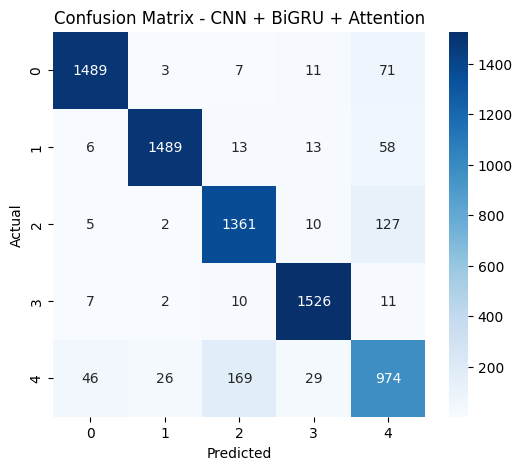

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Embedding, Conv1D, MaxPooling1D, GRU, Bidirectional, Dense, Input,
    Dropout, SpatialDropout1D, Flatten, Attention
)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#  Tokenization (assuming 'df' and 'text_clean' exist)
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['text_clean'])
X_seq = tokenizer.texts_to_sequences(df['text_clean'])
X_padded = pad_sequences(X_seq, maxlen=150)

#  Labels
y = df['sentiment'].astype(int)

#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_padded, y, test_size=0.2, stratify=y, random_state=42
)

#  Model Architecture
embedding_dim = 128
vocab_size = len(tokenizer.word_index) + 1

input_layer = Input(shape=(150,))
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(input_layer)

#  CNN Layer
conv1 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(embedding_layer)
max_pool = MaxPooling1D(pool_size=2)(conv1)

#  BiGRU Layer
bigru = Bidirectional(GRU(100, return_sequences=True))(max_pool)
spatial_dropout = SpatialDropout1D(0.3)(bigru)

#  Self-Attention Mechanism
attention_output = Attention()([spatial_dropout, spatial_dropout])

#  Flatten and Dense Layers
flatten = Flatten()(attention_output)
dense1 = Dense(64, activation='relu')(flatten)
dropout = Dropout(0.4)(dense1)

#  Output Layer (5 classes)
output_layer = Dense(5, activation='softmax')(dropout)

#  Compile Model
model2 = Model(inputs=input_layer, outputs=output_layer)
model2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-4),
    metrics=['accuracy']
)

#  Train Model
history = model2.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)

#  Predictions & Evaluation
y_pred = np.argmax(model2.predict(X_test), axis=1)

#  Classification Report & Accuracy
print("\n Classification Report for CNN + BiGRU + Attention Model:\n", classification_report(y_test, y_pred))
print("\n Accuracy:", accuracy_score(y_test, y_pred))

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - CNN + BiGRU + Attention")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
